In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [93]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/kc_house_data.csv")

In [94]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [96]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [97]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<Axes: xlabel='sqft_living', ylabel='price'>

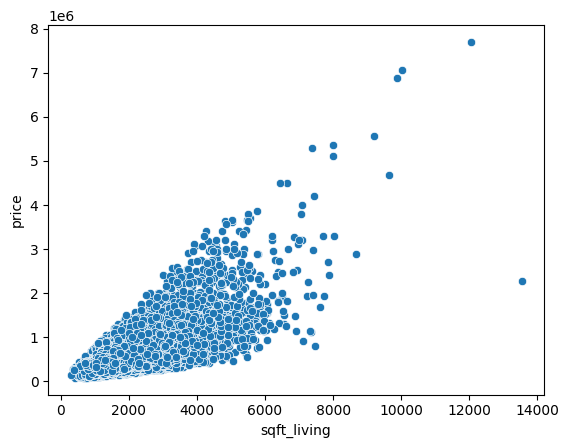

In [98]:
sns.scatterplot(x='sqft_living', y='price',data=df)

<Axes: xlabel='price', ylabel='Count'>

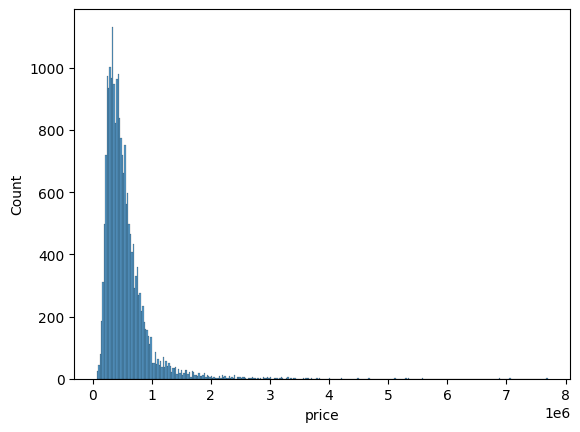

In [99]:
sns.histplot(df['price'])

<Axes: xlabel='view', ylabel='Count'>

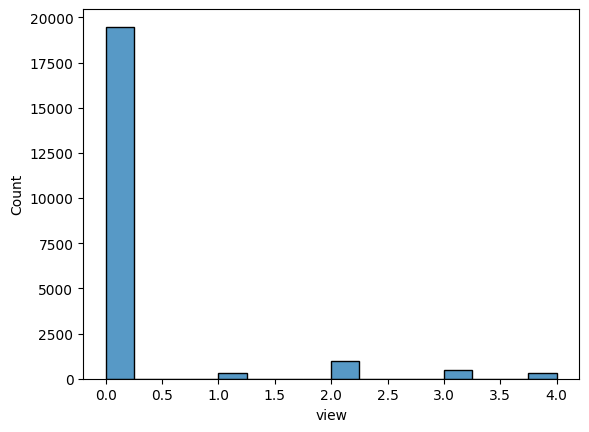

In [100]:
sns.histplot(df['view'])

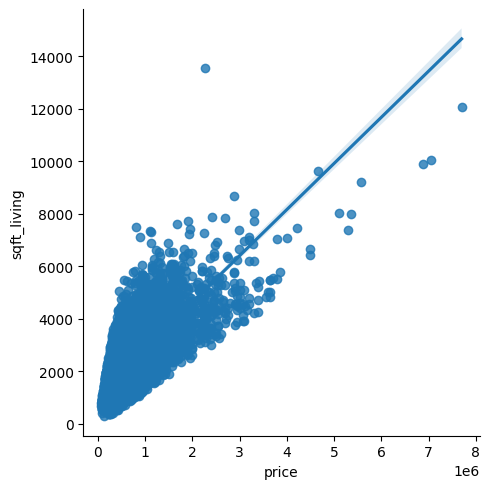

In [101]:
sns.lmplot(x='price',y= 'sqft_living',data=df)

<Axes: ylabel='bedrooms'>

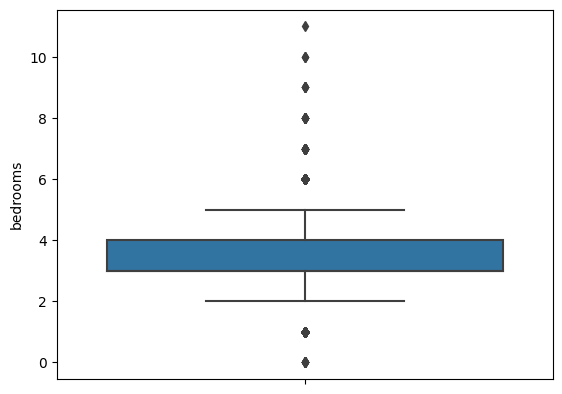

In [227]:
sns.boxplot(data = df, y='bedrooms')

<Axes: ylabel='sqft_living'>

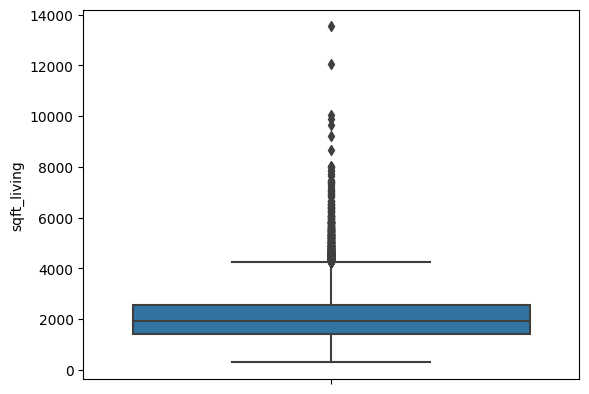

In [225]:
sns.boxplot(data = df, y='sqft_living')

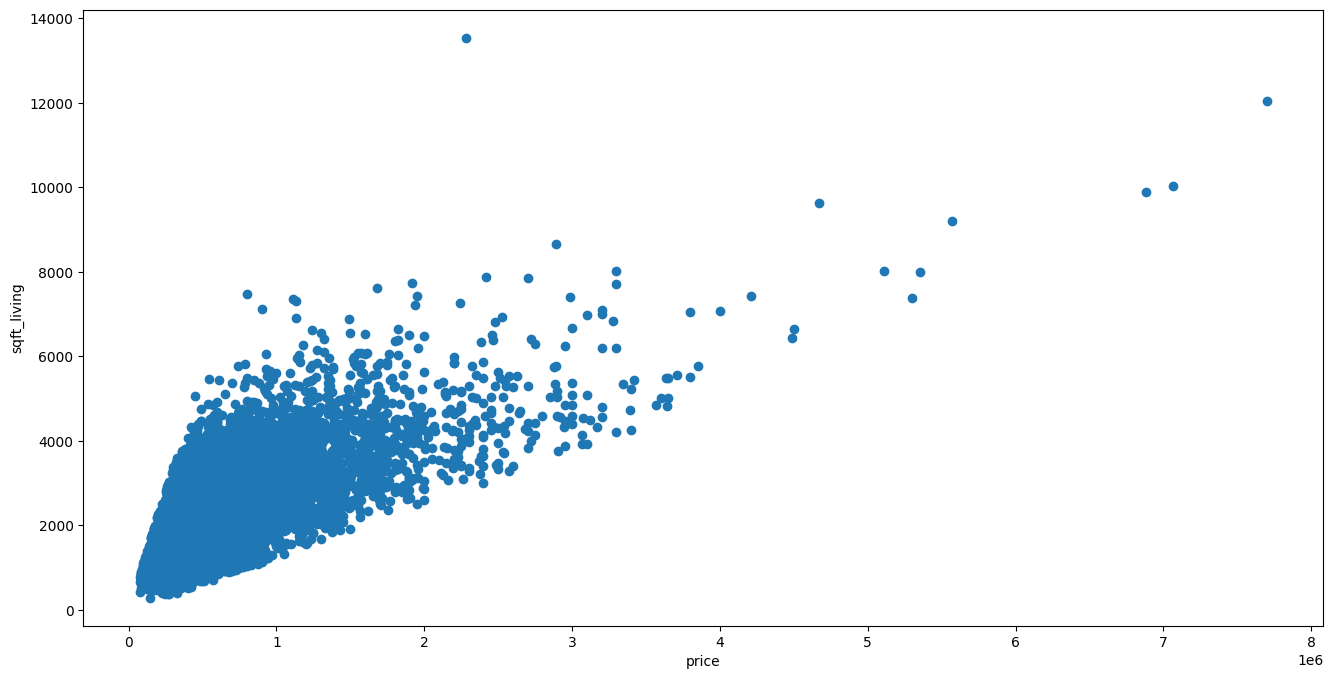

In [103]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['price'], df['sqft_living'])
ax.set_xlabel('price')
ax.set_ylabel('sqft_living')
plt.show()

In [104]:
results = ols("price ~ bedrooms + view + sqft_living", data= df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     8613.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:56:25   Log-Likelihood:            -2.9910e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21609   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.283e+04   6347.358     13.050      

In [105]:
"y_hat = 8.283e+04 - 4.686e+04 bedrooms + 9.772e+04view + 284.7851sqft_living"

'y_hat = 8.283e+04 - 4.686e+04 bedrooms + 9.772e+04view + 284.7851sqft_living'

In [106]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [107]:
8.283e+04 - 4.686e+04*(3) + 9.772e+04*(0) + 284.7851*(1180)

278296.418

In [108]:
pred_vals = results.predict(df[['bedrooms','view','sqft_living']])

In [109]:
pred_vals

0        278293.528498
1        674144.789385
2        208394.018619
3        453563.517893
4        420686.068385
             ...      
21608    377968.306419
21609    553238.295814
21610    279590.288563
21611    397903.262003
21612    279590.288563
Length: 21613, dtype: float64

In [110]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [111]:
res

,y_hat,price
0,278293.528498,221900.0
1,674144.789385,538000.0
2,208394.018619,180000.0
3,453563.517893,604000.0
4,420686.068385,510000.0
...,...,...
21608,377968.306419,360000.0
21609,553238.295814,400000.0
21610,279590.288563,402101.0
21611,397903.262003,400000.0


In [112]:
res['error'] = res['y_hat'] - res['price']

In [113]:
res.head(1)

,y_hat,price,error
0,278293.528498,221900.0,56393.528498


In [114]:
res['sq_error'] = res['error']**2

In [115]:
np.sqrt(res['sq_error'].mean())

247746.86879607473

(array([3.0000e+00, 2.0000e+00, 3.0000e+00, 1.6000e+01, 6.9000e+01,
        3.0200e+02, 7.2580e+03, 1.3808e+04, 1.4800e+02, 4.0000e+00]),
 array([-4173532.80138126, -3584014.49606258, -2994496.1907439 ,
        -2404977.88542522, -1815459.58010653, -1225941.27478785,
         -636422.96946917,   -46904.66415049,   542613.64116819,
         1132131.94648687,  1721650.25180556]),
 <BarContainer object of 10 artists>)

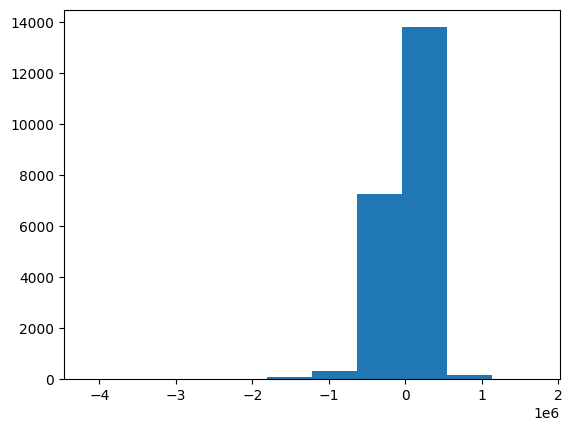

In [116]:
plt.hist(res['error'])

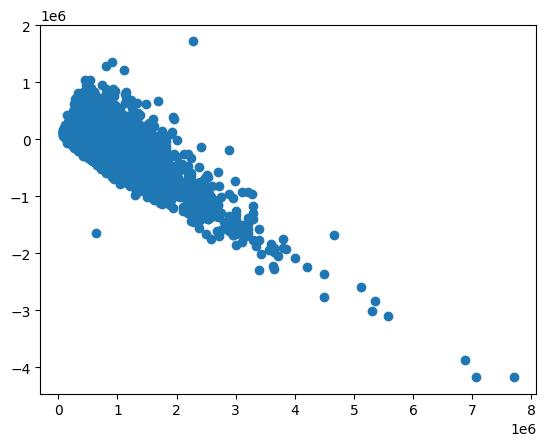

In [117]:
plt.scatter(df['price'],res['error'])

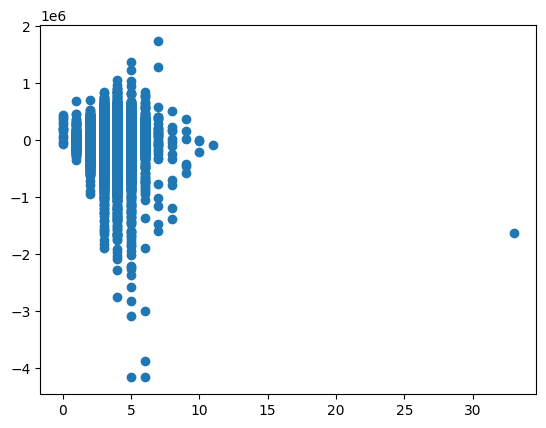

In [118]:
plt.scatter(df['bedrooms'],res['error'])

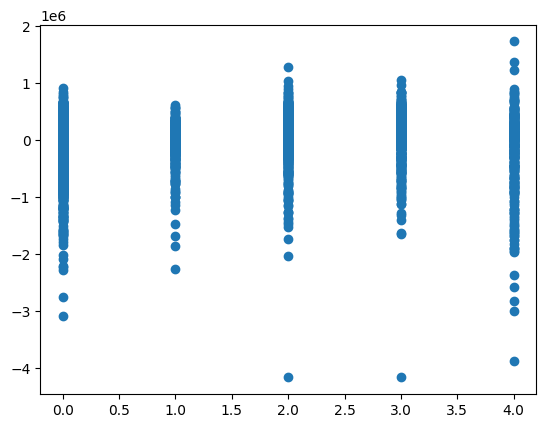

In [119]:
plt.scatter(df['view'],res['error'])

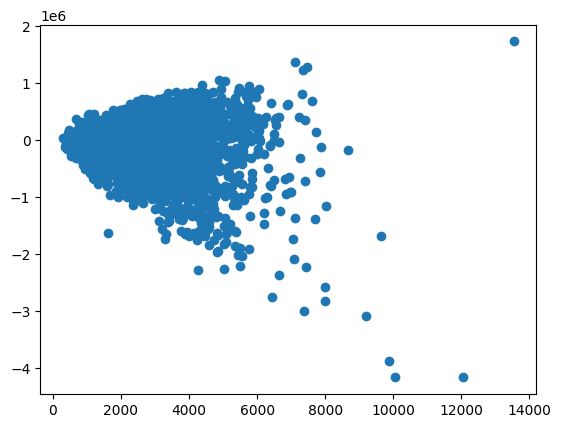

In [120]:
plt.scatter(df['sqft_living'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4173532.80138126, -4159304.09605113, -3875952.91654397, ...,
          1280421.35406552,  1367054.78530857,  1721650.25180556])),
 (228401.57552052138, 3.780553631982923e-09, 0.9217509803274289))

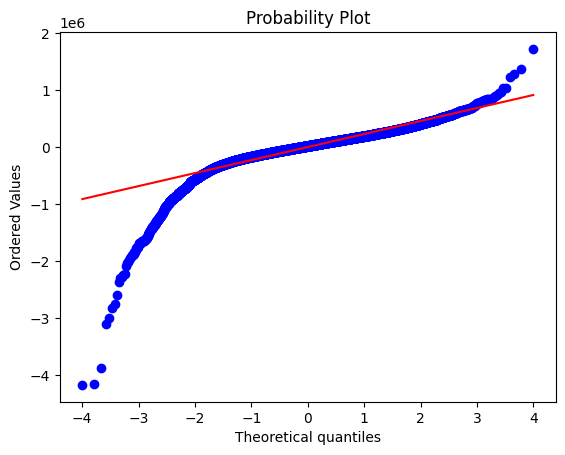

In [121]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [122]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_view  dfb_sqft_living       cooks_d   
0          -0.001086     -0.000312  0.000009         0.001356  1.199593e-06  \
1          -0.002202      0.003445  0.002146        -0.003969  8.251575e-06   
2          -0.001344      0.000617 -0.000014         0.000530  5.577593e-07   
3          -0.001452      0.003697 -0.000751        -0.002296  8.089943e-06   
4           0.001621     -0.000496 -0.000516        -0.000438  1.903853e-06   
...              ...           ...       ...              ...           ...   
21608      -0.000332      0.000040  0.000074         0.000191  8.426620e-08   
21609       0.001598     -0.002576  0.001367         0.000286  7.046479e-06   
21610       0.005732     -0.003340 -0.000282        -0.001114  9.386336e-06   
21611       0.000038     -0.000008 -0.000010        -0.000017  1.092603e-09   
21612       0.002125     -0.001238 -0.000104        -0.000413  1.289572e-06   

       standard_resid  hat_diag  dffits_internal  s

In [123]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_view,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001086,-0.000312,0.000009,0.001356,1.199593e-06,-0.227615,0.000093,-0.002191,-0.227610,-0.002190
1,-0.002202,0.003445,0.002146,-0.003969,8.251575e-06,-0.549511,0.000109,-0.005745,-0.549502,-0.005745
2,-0.001344,0.000617,-0.000014,0.000530,5.577593e-07,-0.114608,0.000170,-0.001494,-0.114605,-0.001494
3,-0.001452,0.003697,-0.000751,-0.002296,8.089943e-06,0.607189,0.000088,0.005689,0.607180,0.005688
4,0.001621,-0.000496,-0.000516,-0.000438,1.903853e-06,0.360482,0.000059,0.002760,0.360475,0.002760
...,...,...,...,...,...,...,...,...,...,...
21608,-0.000332,0.000040,0.000074,0.000191,8.426620e-08,-0.072522,0.000064,-0.000581,-0.072521,-0.000581
21609,0.001598,-0.002576,0.001367,0.000286,7.046479e-06,-0.618493,0.000074,-0.005309,-0.618484,-0.005309
21610,0.005732,-0.003340,-0.000282,-0.001114,9.386336e-06,0.494492,0.000154,0.006127,0.494483,0.006127
21611,0.000038,-0.000008,-0.000010,-0.000017,1.092603e-09,0.008463,0.000061,0.000066,0.008463,0.000066


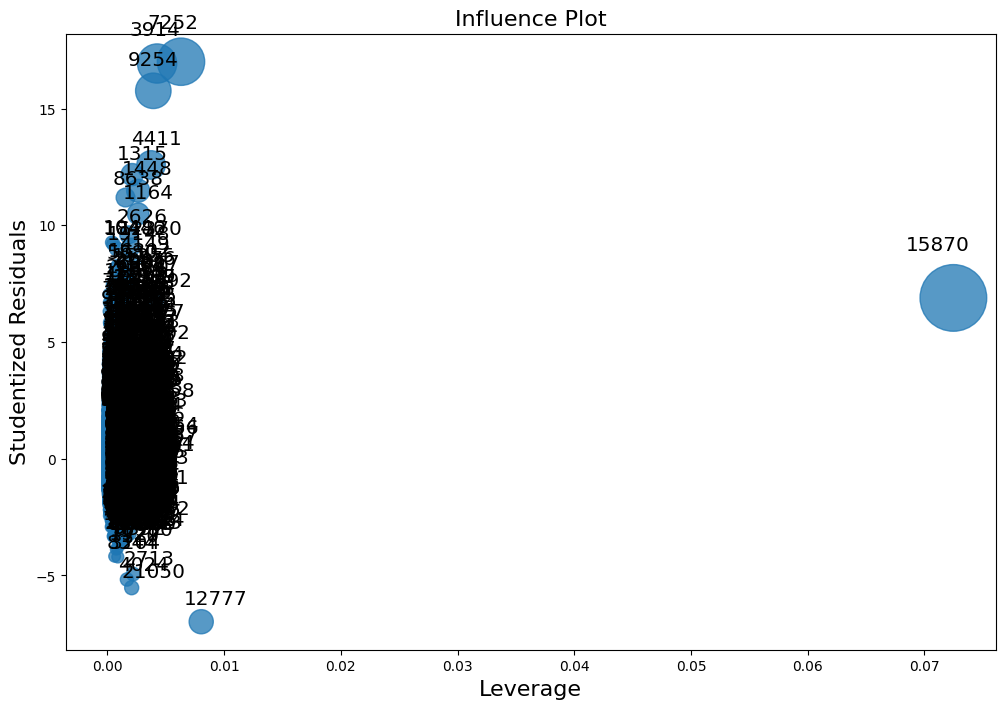

In [124]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [126]:
df.drop(15870, inplace= True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long       

In [128]:
results = ols("price ~ bedrooms + view + sqft_living", data= df).fit()


In [129]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     8648.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:01:02   Log-Likelihood:            -2.9907e+05
No. Observations:               21612   AIC:                         5.981e+05
Df Residuals:                   21608   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.179e+04   6472.457     14.182      

In [130]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_view  dfb_sqft_living       cooks_d   
0          -0.001030     -0.000324  0.000006         0.001338  1.171922e-06  \
1          -0.002399      0.003652  0.002221        -0.004161  8.859508e-06   
2          -0.001466      0.000693 -0.000011         0.000539  6.663013e-07   
3          -0.001671      0.003928 -0.000735        -0.002490  8.729024e-06   
4           0.001603     -0.000507 -0.000516        -0.000411  1.887761e-06   
...              ...           ...       ...              ...           ...   
21608      -0.000330      0.000041  0.000074         0.000190  8.591767e-08   
21609       0.001695     -0.002649  0.001328         0.000399  7.009270e-06   
21610       0.005655     -0.003374 -0.000300        -0.000931  9.129263e-06   
21611       0.000032     -0.000007 -0.000009        -0.000014  7.684846e-10   
21612       0.002004     -0.001196 -0.000106        -0.000330  1.146511e-06   

       standard_resid  hat_diag  dffits_internal  s

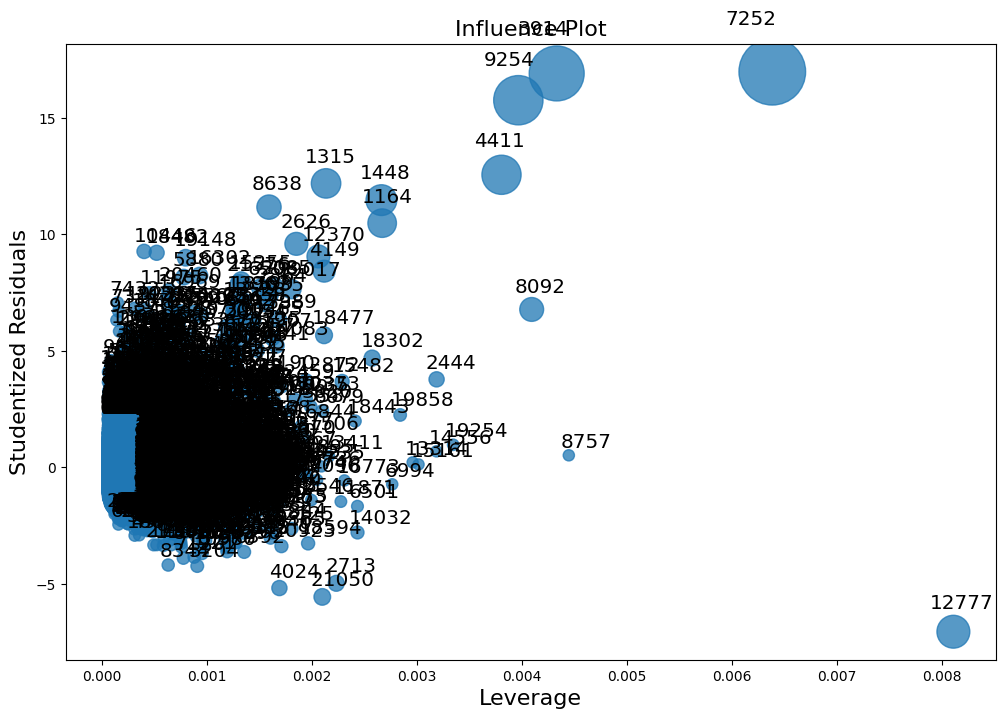

In [131]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [132]:
df_2 = df.copy()

In [133]:
df_2.drop(7252, inplace=True)

In [134]:
results = ols("price ~ bedrooms + floors + sqft_living", data= df_2).fit()

In [135]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7363.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:05:23   Log-Likelihood:            -2.9978e+05
No. Observations:               21611   AIC:                         5.996e+05
Df Residuals:                   21607   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.766e+04   7722.700     11.351      

In [136]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.001333     -0.000292    0.000904         0.001037  1.348969e-06  \
1          -0.000785      0.004149   -0.003658        -0.003234  1.529750e-05   
2          -0.001435      0.000694    0.000388         0.000403  6.733841e-07   
3           0.000392      0.003483   -0.003373        -0.001358  9.729861e-06   
4           0.001950     -0.000429   -0.001633         0.000051  1.877702e-06   
...              ...           ...         ...              ...           ...   
21608       0.000987     -0.000055   -0.003089         0.001370  2.701458e-06   
21609       0.003813     -0.003323   -0.004353         0.002233  1.302693e-05   
21610       0.002299     -0.002799    0.004052        -0.002162  1.117464e-05   
21611       0.000009      0.000028   -0.000449         0.000265  9.585051e-08   
21612       0.000669     -0.000815    0.001179        -0.000629  9.463442e-07   

       standard_resid  hat_

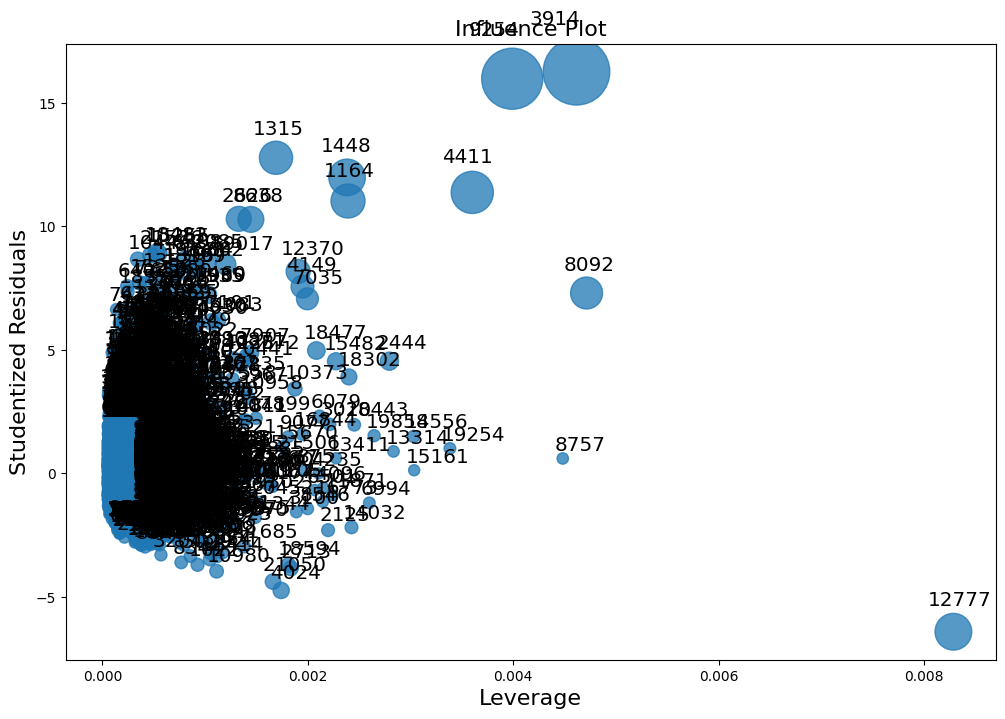

In [137]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [138]:
res

,y_hat,price,error,sq_error
0,278293.528498,221900.0,56393.528498,3.180230e+09
1,674144.789385,538000.0,136144.789385,1.853540e+10
2,208394.018619,180000.0,28394.018619,8.062203e+08
3,453563.517893,604000.0,-150436.482107,2.263114e+10
4,420686.068385,510000.0,-89313.931615,7.976978e+09
...,...,...,...,...
21608,377968.306419,360000.0,17968.306419,3.228600e+08
21609,553238.295814,400000.0,153238.295814,2.348198e+10
21610,279590.288563,402101.0,-122510.711437,1.500887e+10
21611,397903.262003,400000.0,-2096.737997,4.396310e+06


In [154]:
dummies_view = pd.get_dummies(df_2.view, dtype=int)

In [155]:
df_2['view'].unique()

array([0, 3, 4, 2, 1])

In [156]:
dummies_view.rename(columns = {0: 'Terrible', 1: 'Mediocre', 2: 'Okay', 3: 'Decent', 4: 'Great'}, inplace = True)

In [158]:
df_2= pd.concat([df_2,dummies_view], axis=1)

In [162]:
df_2.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Terrible,Mediocre,Okay,Decent,Great
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,98053,47.6561,-122.005,4760,101930,1,0,0,0,0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,98003,47.3097,-122.327,2238,6819,1,0,0,0,0
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,98198,47.4095,-122.315,1650,9711,1,0,0,0,0
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,98146,47.5123,-122.337,1780,8113,1,0,0,0,0
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,98038,47.3684,-122.031,2390,7570,1,0,0,0,0


In [163]:
df_2['date'] = pd.to_datetime(df_2['date'])

In [184]:
daily_dataset = df_2.set_index('date').resample("3D").agg({'price':'mean','bedrooms':'mean','view':'mean','sqft_living':'mean'}).ffill()

In [185]:
daily_dataset

,price,bedrooms,view,sqft_living
date,,,,
2014-05-02,5.264497e+05,3.368421,0.223684,2104.078947
2014-05-05,5.514311e+05,3.461538,0.161538,2140.792308
2014-05-08,5.303579e+05,3.359281,0.233533,2081.550898
2014-05-11,6.292102e+05,3.529762,0.220238,2277.303571
2014-05-14,5.092224e+05,3.364407,0.177966,2052.169492
...,...,...,...,...
2015-05-15,4.500000e+05,5.000000,0.000000,1870.000000
2015-05-18,4.500000e+05,5.000000,0.000000,1870.000000
2015-05-21,4.500000e+05,5.000000,0.000000,1870.000000


In [186]:
results = ols("price ~ bedrooms + view + sqft_living", data= daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           6.84e-39
Time:                        16:17:20   Log-Likelihood:                -1576.1
No. Observations:                 131   AIC:                             3160.
Df Residuals:                     127   BIC:                             3172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.144e+05   5.77e+04     -3.716      

In [187]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [189]:
categorical_features = ['view']
numerical_features = ['bedrooms','sqft_living']
target = 'price'

In [190]:
X_train, X_test, y_train, y_test = train_test_split(df_2[categorical_features + numerical_features]
                                                    ,df_2[target],
                                                    test_size = 0.3, random_state=1234)

In [191]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [192]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [193]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [194]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms',
                                                   'sqft_living'])])),
                ('regressor', LinearRegression())])

In [196]:
pred = linear_regression.predict(X_test)

In [197]:
pred

array([336378., 623958., 455408., ..., 670230., 241510., 709130.])

In [198]:
from sklearn.metrics import mean_squared_error

In [199]:
np.sqrt(mean_squared_error(pred,y_test))

243788.0880586472

In [200]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [201]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms',
                                                   'sqft_living'])])),
                ('regressor', Ridge(alpha=3.0))])

In [202]:
pred_ridge = ridge_regression.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

243708.73965177956

In [204]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [205]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms',
                                                   'sqft_living'])])),
                ('regressor', Lasso())])

In [206]:
lasso_pred = lasso_regression.predict(X_test)

In [207]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

243744.26820241308

In [211]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])
elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms',
                                                   'sqft_living'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [212]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [213]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

255079.16881647133

In [214]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


In [215]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']


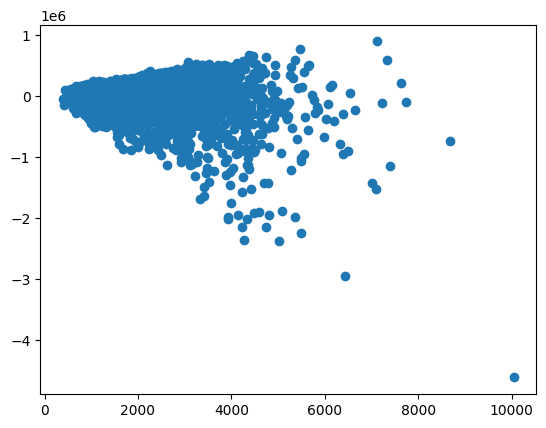

In [224]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

In [217]:
lasso_net_pred = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


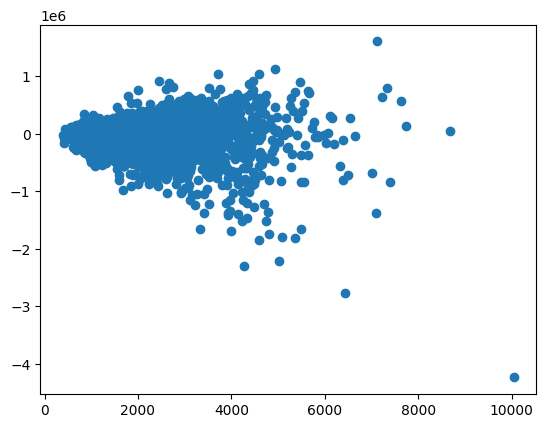

In [219]:
lasso_net_pred['res'] = lasso_net_pred['pred'] - lasso_net_pred['price']

plt.scatter(X_test['sqft_living'],lasso_net_pred['res'])

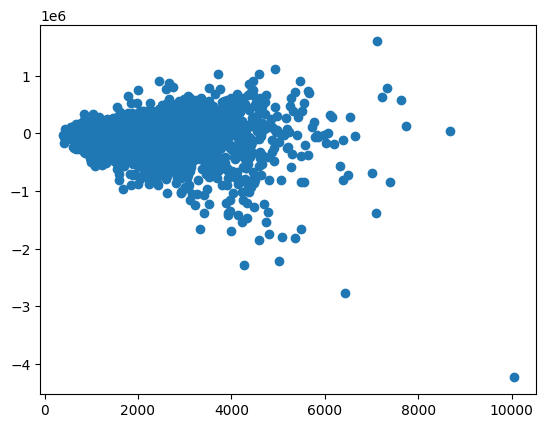

In [220]:
ridge_net_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_net_pred['res'] = ridge_net_pred['pred'] - ridge_net_pred['price']
plt.scatter(X_test['sqft_living'],ridge_net_pred['res'])



1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net. You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
